# in this notebook, results of two experiments with the same seed on Håkan and Saeid's computer has been shown

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [2]:
from scr.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/exchange_rate/1B'

# metric section

In [5]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

201it [00:00, 39531.80it/s]
100%|###########| 100/100 [00:01<00:00, 89.03it/s]


In [6]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,1.605287e-03,1.026074,31.091047,1.036368,0.008791,3.890636,0.032977,0.032248,NaN,47.517278,0.514060,0.533333,1.026074,0.933333,0.371640,1.000000
1,1,1.0,1.572966e-02,3.340712,47.975410,1.599180,0.016455,6.767263,0.069816,0.066842,NaN,159.375450,3.414544,0.900000,3.340712,1.000000,0.962842,1.000000
2,2,2.0,5.195843e-03,1.969478,30.113565,1.003786,0.006396,10.264873,0.065534,0.063086,NaN,247.994498,2.066053,0.900000,1.969479,1.000000,0.571697,1.000000
3,3,3.0,3.979528e-03,1.644190,31.995962,1.066532,0.009511,5.762636,0.051627,0.049899,NaN,125.247163,1.547429,0.766667,1.644190,0.966667,0.497151,1.000000
4,4,4.0,2.716492e-06,0.049164,4.801961,0.160065,0.000207,7.910838,0.010234,0.010296,NaN,42.030561,0.035176,0.000000,0.049164,0.000000,0.017066,1.000000
5,5,5.0,7.172654e-07,0.022360,0.375037,0.012501,0.000103,7.269258,0.059780,0.062148,NaN,146.386877,0.007008,0.000000,0.022360,0.000000,0.019285,0.233333
6,6,6.0,1.067429e-03,0.870375,24.554323,0.818477,0.007422,3.909018,0.035506,0.034712,NaN,44.641824,0.395601,0.566667,0.870375,1.000000,0.322329,1.000000
7,7,7.0,1.134183e-03,0.892449,24.538731,0.817958,0.003404,8.739088,0.036403,0.035549,NaN,112.114968,0.469263,0.666667,0.892449,1.000000,0.313588,1.000000
8,8,0.0,1.664875e-03,1.068893,31.412418,1.047081,0.008773,4.061476,0.033992,0.033228,NaN,45.103030,0.475198,0.633333,1.068893,1.000000,0.385699,1.000000
9,9,1.0,8.421714e-03,2.380406,48.259655,1.608655,0.016415,4.833759,0.049203,0.047702,NaN,93.557642,1.953831,0.766667,2.380406,1.000000,0.789097,1.000000


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,1.605287e-03,1.026074,31.091047,1.036368,0.008791,3.890636,0.032977,0.032248,NaN,47.517278,0.514060,0.533333,1.026074,0.933333,0.371640,1.000000
1,8,0.0,1.664875e-03,1.068893,31.412418,1.047081,0.008773,4.061476,0.033992,0.033228,NaN,45.103030,0.475198,0.633333,1.068893,1.000000,0.385699,1.000000
2,16,0.0,2.158716e-03,1.302898,31.442495,1.048083,0.008757,4.959228,0.041362,0.040407,NaN,67.123219,0.714534,0.933333,1.302898,1.000000,0.433015,1.000000
3,24,0.0,4.328578e-03,1.817285,31.072994,1.035766,0.008744,6.927710,0.058622,0.056648,NaN,145.783150,1.642107,0.900000,1.817285,1.000000,0.539592,1.000000
4,32,0.0,1.519163e-03,1.122880,30.949823,1.031661,0.008724,4.290463,0.036235,0.035518,NaN,53.349143,0.559655,0.833333,1.122880,1.000000,0.383270,1.000000
5,1,1.0,1.572966e-02,3.340712,47.975410,1.599180,0.016455,6.767263,0.069816,0.066842,NaN,159.375450,3.414544,0.900000,3.340712,1.000000,0.962842,1.000000
6,9,1.0,8.421714e-03,2.380406,48.259655,1.608655,0.016415,4.833759,0.049203,0.047702,NaN,93.557642,1.953831,0.766667,2.380406,1.000000,0.789097,1.000000
7,17,1.0,1.578579e-02,3.342295,48.184841,1.606161,0.016369,6.805962,0.069589,0.066672,NaN,164.190484,3.501221,0.966667,3.342295,1.000000,0.956718,1.000000
8,25,1.0,1.859125e-02,3.591313,46.918461,1.563949,0.016344,7.324552,0.076938,0.073361,NaN,190.849468,4.087513,0.966667,3.591313,1.000000,1.003941,1.000000
9,33,1.0,1.564278e-02,3.526169,45.252384,1.508413,0.016318,7.202917,0.077923,0.074661,NaN,186.536018,3.987692,1.000000,3.526169,1.000000,0.983644,1.000000


# Forecast section

In [11]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

201it [00:00, 39188.17it/s]
100%|###########| 100/100 [00:11<00:00,  8.48it/s]


In [12]:
len(forcast_list1)

100

In [13]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=8)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [14]:
sorted_forcast_list1[0].head(26)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2013-04-09,1.026905,1.025171,1.039257,1.037230,1.029608,1.028275,1.017177,...,1.039965,1.019800,1.044668,1.037569,1.011429,1.035184,0,1.026527,0.018176,0.132355
1,1,0,2013-04-10,1.037344,1.006547,1.044947,1.029132,1.022672,1.036988,1.030464,...,1.007378,1.024339,1.039940,1.021641,1.028899,1.042660,0,1.034182,0.020566,0.111951
2,1,0,2013-04-11,1.038875,1.025143,1.035316,1.034181,1.036491,1.067537,1.046421,...,1.028787,1.021328,1.025250,1.035778,1.008959,1.040404,0,1.040654,0.020962,0.113330
3,1,0,2013-04-12,1.032855,1.050745,1.033395,1.035817,1.043009,1.057658,1.052287,...,0.980986,1.034698,1.055833,1.042171,1.044937,1.036349,0,1.041806,0.020175,0.167866
4,1,0,2013-04-15,1.033293,1.006799,1.044994,1.035633,1.038486,1.046358,1.031570,...,1.026947,1.037843,1.030475,1.032818,1.011194,1.053730,0,1.043754,0.016170,0.183057
5,1,0,2013-04-16,1.031800,1.022540,1.027120,1.052108,1.041211,1.049150,1.045065,...,1.022993,1.015171,1.035516,1.035780,1.018532,1.044282,0,1.039680,0.018065,0.131597
6,1,0,2013-04-17,1.025546,1.033695,0.999308,1.051384,1.040951,1.046761,1.043296,...,1.029840,1.038525,1.045155,1.053035,1.039969,1.062114,0,1.044921,0.023384,0.152203
7,1,0,2013-04-18,1.034650,1.036289,1.059366,1.056428,1.052960,1.101950,1.025183,...,1.027668,1.038687,1.086012,1.047664,1.011180,1.049998,0,1.050303,0.021632,0.220945
8,1,0,2013-04-19,1.035411,1.041269,1.048947,1.039828,1.055625,1.064236,1.060120,...,1.033040,1.057037,1.013043,1.023286,1.030733,1.060501,0,1.057267,0.033733,0.114469
9,1,0,2013-04-22,1.035025,1.052220,1.066049,0.983601,1.039996,1.076247,1.052351,...,0.998136,1.044751,1.047549,1.044325,1.039738,1.033193,0,1.052224,0.022795,0.146395


In [15]:
target_forcast_series = get_forcast_target(forcast_list1)

In [16]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

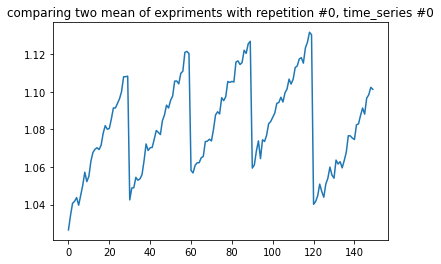

In [17]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [18]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[7]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[36]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[42]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [19]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
# underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
# the worst one is 100% true
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


# print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of worst repetition for experiment A = 1')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 1
percentage of underprediction of best repetition for experiment A = 0.36
percentage of underprediction of highest repetition for experiment A = 0.7016666666666667
percentage of underprediction of lowest repetition for experiment A = 0.5725


768

In [57]:
# find the one with the highest prediction
# find the one with the highest prediction



get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(11, 1)

In [58]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [59]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (13, 26)


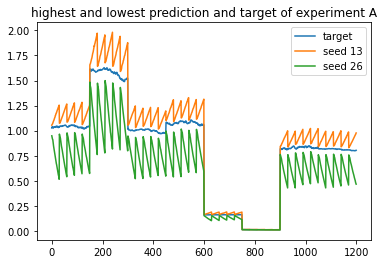

In [60]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[13]['mean'].plot(legend=True, label='seed 13')
sorted_forcast_list1[26]['mean'].plot(legend=True, label='seed 26')
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

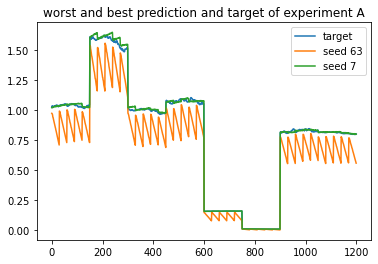

In [61]:
plt.title('worst and best prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[63]['mean'].plot(legend=True, label='seed 63')
sorted_forcast_list1[7]['mean'].plot(legend=True, label='seed 7')
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

## find the tuples for all the time series (it takes much time)

In [25]:
# get all the 321 pairs here
lower_pair_list = []
higher_pair_list = []

for i in range(321):
    # lower values
    higher_flag = False
    idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    lower_pair_list.append(idx_dif)
    break
    # higher values
    # higher_flag = True
    # idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    # higher_pair_list.append(idx_dif)


NameError: name 'sorted_forcast_list2' is not defined

In [26]:
# calculating the most appeared pairs
import statistics 
from statistics import mode 

mode(lower_pair_list), mode(higher_pair_list)

StatisticsError: no mode for empty data

## take the average of experiment A and plot it
the reults show that after running 100 times, the average of results are converging.

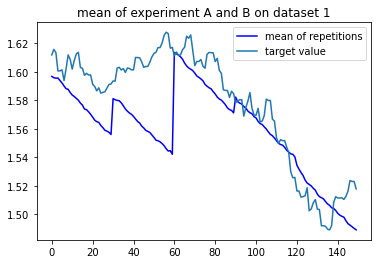

In [65]:
ts_no = 1

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue', label='mean of repetitions')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy(), label='target value')
plt.legend()
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape